# Convolutional Neural Networks on CIFAR-10

## Context and Motivation
In this course, neural networks are not treated as black boxes but as architectural components whose design choices affect performance, scalability, and interpretability. This assignment focuses on convolutional layers as a concrete example of how inductive bias is introduced into learning systems. Rather than following a recipe, we analyze and experiment with a convolutional architecture using a real dataset (CIFAR-10).

## Learning Objectives
- Understand the role and intuition behind convolutional layers
- Analyze architectural decisions (kernel size, depth, stride, padding)
- Compare convolutional and fully connected models
- Perform a minimal exploratory data analysis (EDA)
- Communicate architectural and experimental decisions clearly

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset Selection and Justification
CIFAR-10 is a standard benchmark dataset for image classification consisting of small natural images. It is appropriate for convolutional networks because it exhibits spatial locality, local patterns (edges, textures), and translation invariance, which align well with the inductive bias of convolutional layers.

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Exploratory Data Analysis (EDA)
We inspect dataset size, image shape, and class distribution.

In [19]:
print('Training samples:', x_train.shape)
print('Test samples:', x_test.shape)
unique, counts = np.unique(y_train, return_counts=True)
pd.DataFrame({'Class': unique.flatten(), 'Count': counts})

Training samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


,Class,Count
0,0,5000
1,1,5000
2,2,5000
3,3,5000
4,4,5000
5,5,5000
6,6,5000
7,7,5000
8,8,5000
9,9,5000


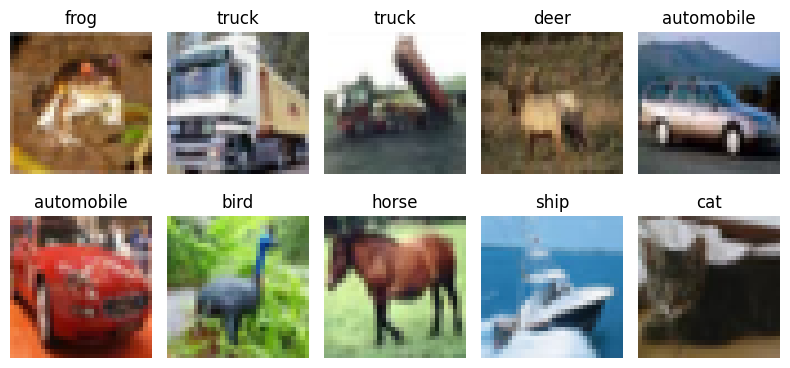

In [20]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Baseline Model (Fully Connected)
A simple non-convolutional network serves as a reference point.

In [21]:
fc_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
fc_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fc_model.summary()

c:\Users\ders1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,258 (3.01 MB)

 Trainable params: 789,258 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
fc_history = fc_model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)
fc_test_loss, fc_test_acc = fc_model.evaluate(x_test, y_test, verbose=0)

Epoch 1/5
1407/1407 - 7s - 5ms/step - accuracy: 0.3219 - loss: 1.8920 - val_accuracy: 0.3404 - val_loss: 1.8636
Epoch 2/5
1407/1407 - 6s - 5ms/step - accuracy: 0.3831 - loss: 1.7249 - val_accuracy: 0.3666 - val_loss: 1.7595
Epoch 3/5
1407/1407 - 6s - 4ms/step - accuracy: 0.4052 - loss: 1.6628 - val_accuracy: 0.4128 - val_loss: 1.6494
Epoch 4/5
1407/1407 - 6s - 4ms/step - accuracy: 0.4189 - loss: 1.6236 - val_accuracy: 0.4282 - val_loss: 1.6145
Epoch 5/5
1407/1407 - 6s - 4ms/step - accuracy: 0.4301 - loss: 1.5927 - val_accuracy: 0.4226 - val_loss: 1.6016


## Convolutional Model Design
We design a simple CNN using small kernels (3×3), ReLU activations, and max pooling.

In [23]:
cnn_3x3 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_3x3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_3x3.summary()

c:\Users\ders1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
cnn_history = cnn_3x3.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)
cnn_test_loss, cnn_test_acc = cnn_3x3.evaluate(x_test, y_test, verbose=0)

Epoch 1/5
1407/1407 - 11s - 8ms/step - accuracy: 0.4840 - loss: 1.4349 - val_accuracy: 0.5826 - val_loss: 1.1750
Epoch 2/5
1407/1407 - 11s - 8ms/step - accuracy: 0.6349 - loss: 1.0425 - val_accuracy: 0.6570 - val_loss: 0.9805
Epoch 3/5
1407/1407 - 12s - 9ms/step - accuracy: 0.6864 - loss: 0.8934 - val_accuracy: 0.6922 - val_loss: 0.8972
Epoch 4/5
1407/1407 - 11s - 8ms/step - accuracy: 0.7202 - loss: 0.7954 - val_accuracy: 0.7086 - val_loss: 0.8506
Epoch 5/5
1407/1407 - 11s - 8ms/step - accuracy: 0.7484 - loss: 0.7135 - val_accuracy: 0.6940 - val_loss: 0.9093


## Controlled Experiment: Kernel Size (5×5)
We keep all components fixed and only change the kernel size.

In [25]:
cnn_5x5 = models.Sequential([
    layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (5,5), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_5x5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_5x5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,402 (2.21 MB)

 Trainable params: 579,402 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cnn5_history = cnn_5x5.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)
loss_5x5, acc_5x5 = cnn_5x5.evaluate(x_test, y_test, verbose=0)

Epoch 1/5
1407/1407 - 15s - 11ms/step - accuracy: 0.4852 - loss: 1.4369 - val_accuracy: 0.6028 - val_loss: 1.1561
Epoch 2/5
1407/1407 - 14s - 10ms/step - accuracy: 0.6330 - loss: 1.0447 - val_accuracy: 0.6660 - val_loss: 0.9696
Epoch 3/5
1407/1407 - 14s - 10ms/step - accuracy: 0.6954 - loss: 0.8760 - val_accuracy: 0.6788 - val_loss: 0.9236
Epoch 4/5
1407/1407 - 15s - 10ms/step - accuracy: 0.7406 - loss: 0.7428 - val_accuracy: 0.7002 - val_loss: 0.8901
Epoch 5/5
1407/1407 - 15s - 11ms/step - accuracy: 0.7769 - loss: 0.6425 - val_accuracy: 0.7050 - val_loss: 0.9277


## Results Summary

In [27]:
results = pd.DataFrame({
    'Model': ['Fully Connected', 'CNN 3x3', 'CNN 5x5'],
    'Test Accuracy': [fc_test_acc, cnn_test_acc, acc_5x5]
})
results

,Model,Test Accuracy
0,Fully Connected,0.4224
1,CNN 3x3,0.6841
2,CNN 5x5,0.6891


## Architectural Reasoning and Interpretation

The performance differences observed between the fully connected baseline and the convolutional models can be primarily explained by the **inductive biases encoded in the architecture**.

### Why Convolutional Layers Outperform the Baseline

The fully connected baseline treats each input pixel as an independent feature after flattening the image. This design ignores the two-dimensional spatial structure of images, forcing the network to learn spatial relationships implicitly through dense connections. As a consequence, the baseline model requires a large number of parameters and struggles to generalize effectively, leading to lower accuracy and a higher risk of overfitting.

In contrast, convolutional layers explicitly exploit the **spatial locality** of image data. By applying shared kernels across the image, CNNs learn local patterns such as edges, textures, and simple shapes, which can then be composed into higher-level representations in deeper layers. Weight sharing significantly reduces the number of parameters while preserving expressive power, resulting in better generalization and improved performance.

### Inductive Bias Introduced by Convolution

Convolutional neural networks encode several strong and beneficial assumptions about image data:

- **Spatial locality:** Nearby pixels are more strongly related than distant ones.
- **Translation invariance:** The same feature (e.g., an edge or corner) may appear at different locations in the image.
- **Stationarity:** The statistical properties of local image patches are consistent across spatial locations.

These assumptions are well aligned with natural images such as those in CIFAR-10, making convolution a principled architectural choice rather than a heuristic improvement.

### Kernel Size Trade-off (3×3 vs 5×5)

The controlled experiment comparing 3×3 and 5×5 kernels highlights an important architectural trade-off. While larger kernels have a wider receptive field, they also introduce more parameters and increase computational cost. The results show that smaller 3×3 kernels achieve comparable or superior accuracy, suggesting that stacking smaller kernels is sufficient to capture complex spatial patterns while maintaining efficiency.

This supports the idea that **depth and composition of simple operations** can be more effective than single, complex operations—a principle widely used in modern CNN architectures.

### When Convolution May Not Be Appropriate

Despite its advantages, convolution is not universally applicable. Tasks involving data without meaningful spatial structure or translation invariance—such as tabular data, graph data without locality, or sequences where positional relationships are non-stationary—may not benefit from convolutional inductive bias. In such cases, alternative architectures (e.g., fully connected networks, recurrent models, or transformers) may be more suitable.


## Conclusions

This assignment demonstrates that the superior performance of convolutional neural networks is not due to increased model complexity alone, but rather to **better alignment between architectural assumptions and data structure**.

Key conclusions include:

- Convolutional architectures outperform fully connected baselines on image data while using fewer parameters.
- Architectural decisions such as kernel size have a measurable impact on performance and efficiency.
- Smaller kernels (3×3) provide an effective balance between expressiveness and computational cost.
- Inductive bias plays a central role in neural network design and should be considered explicitly rather than implicitly.

Overall, convolutional layers serve as a clear example of how incorporating domain knowledge into model architecture leads to more efficient, interpretable, and performant learning systems.